## Import Libraries

In [3]:
# debugging and formatter
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
!pip install faker

<IPython.core.display.Javascript object>

Faker is a Python package that generates fake data for you. Whether you need to create datasets that contain certains types of features and targets, or anonymize data taken from a production service, Faker is for you.


In [5]:
# https://faker.readthedocs.io/
from faker import Faker

fake = Faker("fr_FR")

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv("prenom.csv")

<IPython.core.display.Javascript object>

In [12]:
my_list_of_name = df["prenom"].tolist()

<IPython.core.display.Javascript object>

In [17]:
fake.sentence(ext_word_list=my_list_of_name)

'Stoimenov ZIDIN FUSAKAZU MILOSIJA.'

<IPython.core.display.Javascript object>

In [18]:
fake.text()

'Répondre personne suivre lentement manier. Instinct ouvert violence comme dur voile. Combien mériter chat user grave soumettre ensuite repas.'

<IPython.core.display.Javascript object>

In [22]:
fake.name()

'Françoise Gosselin'

<IPython.core.display.Javascript object>

# Creating synthetic data

### Timeseries 

In [28]:
def faker_timeseries_rows(num=1, seed=None):
    """
    """
    fake.seed_instance(seed)

    time_gen = fake.time_series(start_date=f"-{num}d", end_date="now", precision=3600)

    output = [
        {
            "datetime": next(time_gen),
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": fake.country(),
        }
        for x in range(num)
    ]
    return output

<IPython.core.display.Javascript object>

In [29]:
df = pd.DataFrame(faker_timeseries_rows(10, seed=0))
df.head(5)


,datetime,name,email,country
0,"(2022-07-02 14:03:12, 3039.918665490173)",Thierry,qfournier@wanadoo.fr,Malaisie
1,"(2022-07-02 15:03:12, 1457.7628948214915)",Bailly,lpelletier@sfr.fr,Mariannes du Nord (Îles)
2,"(2022-07-02 16:03:12, 501.3853387133495)",Joly,mauricesusanne@bouygtel.fr,Yemen
3,"(2022-07-02 17:03:12, 1917.2290827186978)",Munoz,thierryperrin@hotmail.fr,Vietnam
4,"(2022-07-02 18:03:12, 3061.7057745333173)",Rémy,gvaillant@live.com,La Barbad


<IPython.core.display.Javascript object>

### Categorical data

In [30]:
def faker_categorical(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": np.random.choice(["United Kingdom", "France", "Belgium"]),
            "gender": np.random.choice(["M", "F", "Not Specified"], p=[0.3, 0.6, 0.1]),
            "avg_rating": np.random.choice(
                np.arange(0, 6, 1), p=[0.5, 0.05, 0.05, 0.30, 0.05, 0.05]
            ),
        }
        for x in range(num)
    ]
    return output

<IPython.core.display.Javascript object>

In [31]:
df = pd.DataFrame(faker_categorical(num=100, seed=0))
df.head(5)

,name,email,country,gender,avg_rating
0,Collin,qfournier@wanadoo.fr,United Kingdom,F,3
1,Vallée,ebailly@live.com,France,F,0
2,Guillon,corinnejoly@club-internet.fr,Belgium,M,0
3,Joly,mauricesusanne@bouygtel.fr,France,F,1
4,Rossi,thierryperrin@hotmail.fr,United Kingdom,F,3


<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x1e16587d130>,
 [Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(1, 0, '1'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(2, 0, '2')])

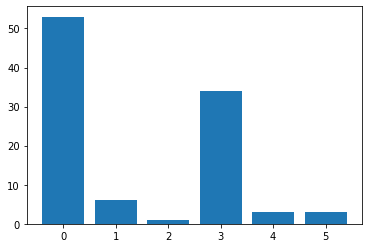

<IPython.core.display.Javascript object>

In [32]:
plt.bar(df["avg_rating"].value_counts().index, df["avg_rating"].value_counts().values)
plt.xticks(df["avg_rating"].value_counts().index, df["avg_rating"].value_counts().index)

### Imbalanced data

In [33]:
def imbalanced_data(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": np.random.choice(["United Kingdom", "France", "Belgium"]),
            "gender": np.random.choice(["M", "F", "Not Specified"], p=[0.3, 0.6, 0.1]),
            "avg_rating": np.random.choice(
                np.arange(0, 6, 1), p=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1]
            ),
            "long_tailed": np.random.lognormal(3, 1, 1)[0],
            "target": np.random.binomial(1, 0.05, 1)[0],
        }
        for x in range(num)
    ]
    return output

<IPython.core.display.Javascript object>

In [34]:
%%time
df = pd.DataFrame(imbalanced_data(num=10000, seed=0))
df.head(5)

Wall time: 2.03 s


,name,email,country,gender,avg_rating,long_tailed,target
0,Collin,qfournier@wanadoo.fr,United Kingdom,F,4,21.560421,0
1,Vallée,ebailly@live.com,Belgium,F,4,21.607520,1
2,Guillon,corinnejoly@club-internet.fr,Belgium,F,4,1.775435,0
3,Joly,mauricesusanne@bouygtel.fr,United Kingdom,M,0,12.768028,0
4,Rossi,thierryperrin@hotmail.fr,Belgium,M,4,82.630362,0


<IPython.core.display.Javascript object>

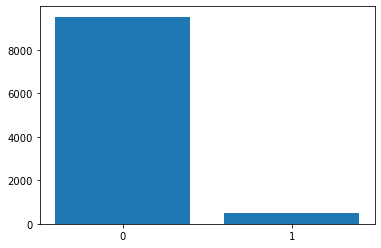

<IPython.core.display.Javascript object>

In [35]:
x = df["target"].value_counts().index
y = df["target"].value_counts().values
plt.xticks(x, x)
_ = plt.bar(x, y)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         10000 non-null  object 
 1   email        10000 non-null  object 
 2   country      10000 non-null  object 
 3   gender       10000 non-null  object 
 4   avg_rating   10000 non-null  int64  
 5   long_tailed  10000 non-null  float64
 6   target       10000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


<IPython.core.display.Javascript object>

In [38]:
df.to_csv("fake_data.csv")

<IPython.core.display.Javascript object>

The problem with creating synthetic datasets that have more than 1 feature is that there are no relationships between features, as they are random.
This leads to poor quality in terms of insights as all columns are independent from each other. 
